In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('insurance.csv')

In [5]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Expolatory Data Analysis

In [6]:
print(df.shape)

(1338, 7)


In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [13]:
df.index

RangeIndex(start=0, stop=1338, step=1)

# Data Visualization

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
fig = px.histogram(df, x='age', nbins=30, title='Age Distribution', color='smoker', 
                  color_discrete_map={'yes': 'green', 'no': 'yellow'})
fig.update_traces( marker_line_color='black', marker_line_width=1.5)
fig.show()

<Axes: xlabel='age', ylabel='Count'>

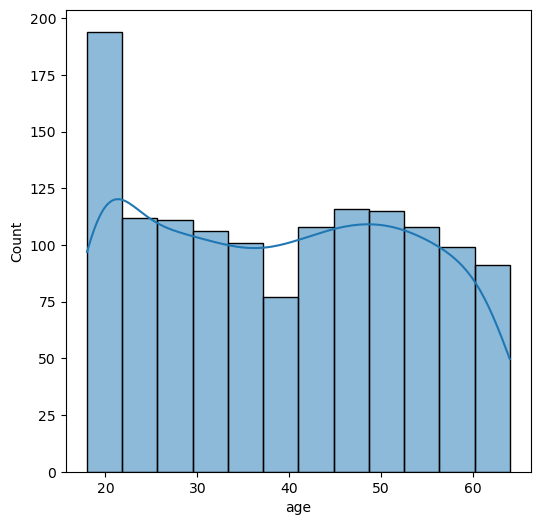

In [16]:
plt.figure(figsize= (6,6))
sns.histplot(x=df['age'], kde=True)

In [17]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [18]:
columns = ['age', 'bmi', 'children','charges']

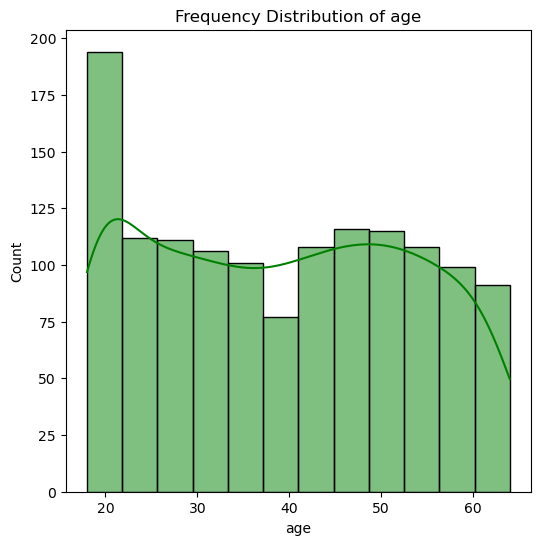

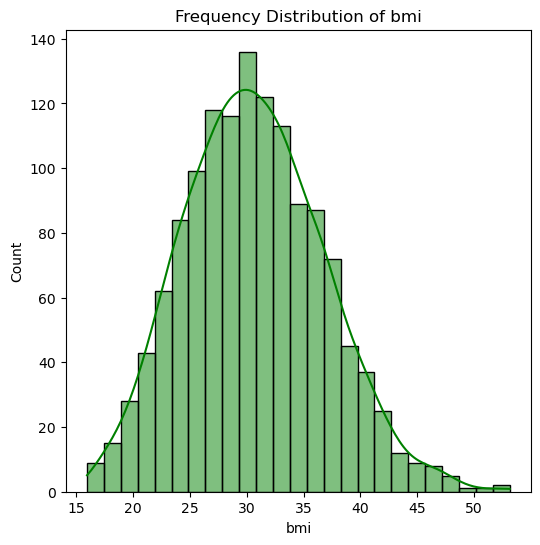

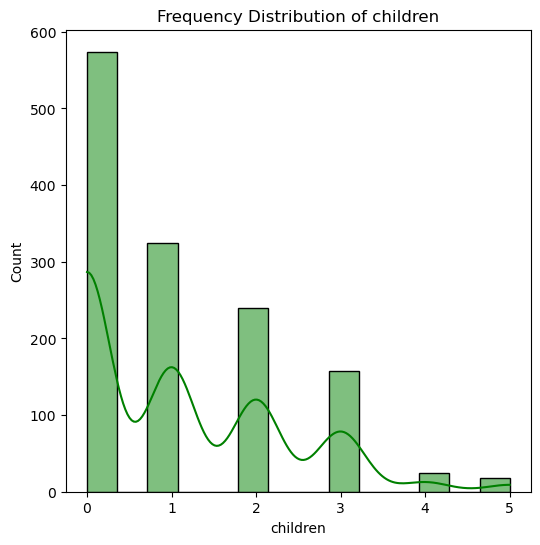

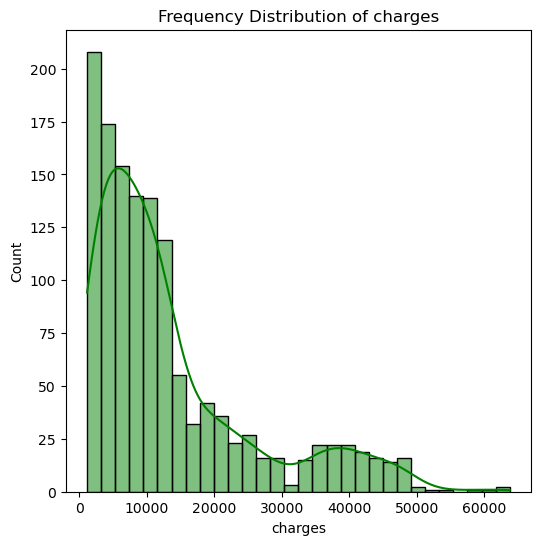

In [19]:
for col in columns:
    plt.figure(figsize = (6,6))
    sns.histplot(x = df[col], color="green", kde=True)
    plt.title(f"Frequency Distribution of {col}")

Text(0.5, 1.0, 'Bar plot of Smoker vs Charges')

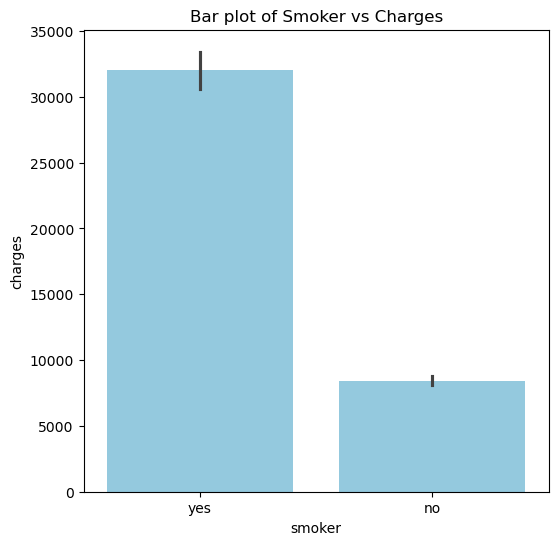

In [20]:
plt.figure(figsize=(6,6))
sns.barplot(y=df['charges'],x=df['smoker'], color='skyblue')
plt.title("Bar plot of Smoker vs Charges")

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
fig = px.scatter(df, x='bmi', y='charges', color='sex', title='BMI vs Charges by Sex Status')
fig.show()

In [23]:
fig = px.sunburst(df, path=['region', 'sex','children'], title='Sunburst Chart of Region and Smoker Status')
fig.show()

In [24]:
for col in columns:
    fig = px.box(df, x=col, title=f'box plot of {col}')
    fig.show()

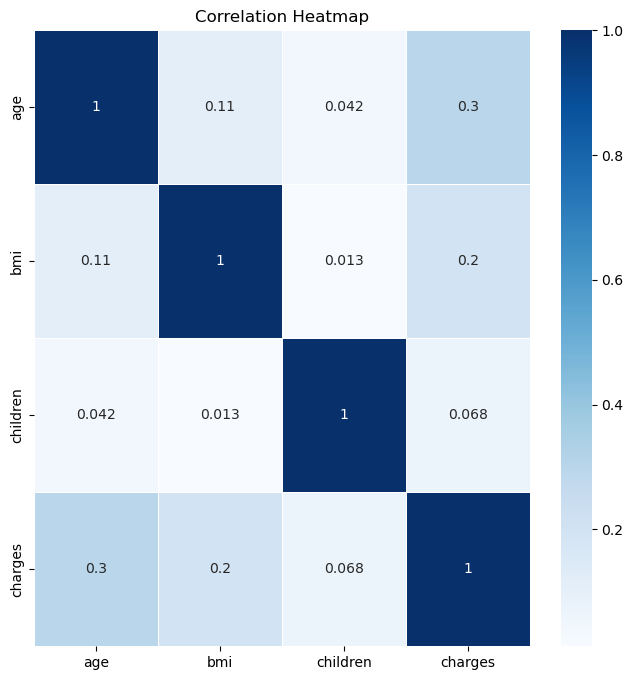

In [25]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()  

In [26]:
fig = px.bar(df,x='region', y='charges', color='region', title='Region vs Charges' )
fig.show()  

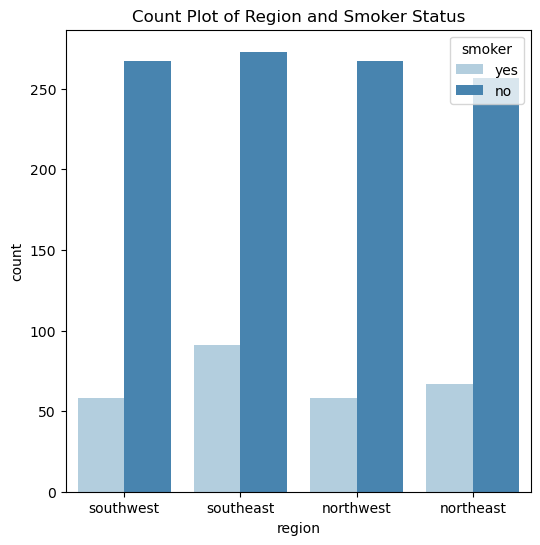

In [27]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['region'], hue=df['smoker'],palette='Blues')
plt.title('Count Plot of Region and Smoker Status')         
plt.show()

In [28]:
df_region_mean = df.groupby('region')['charges'].mean().reset_index()
df_region_mean

,region,charges
0,northeast,13406.384516
1,northwest,12417.575374
2,southeast,14735.411438
3,southwest,12346.937377


In [29]:
# fig = px.bar(df,y = df.groupby('region')['charges'].mean().index,x = 'region',  title='Average Charges by Region')
fig = px.bar(df_region_mean, x='region', y='charges', title='Average Charges by Region')
fig.show()

In [30]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [31]:
df_child_mean = df.groupby('children')['charges'].mean().reset_index()

fig = px.bar(df_child_mean, x = 'children', y = 'charges', title='Average Charges by Number of Children' )
fig.show()

In [32]:
df_smoker = df.groupby('smoker')['charges'].mean().reset_index()

fig = px.bar(df_smoker, x = 'smoker', y = 'charges', title='Average Charges by Number of Children')
fig.show()

In [33]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Clening and Preprosessing

In [34]:
df_cleand = df.copy()

In [35]:
df_cleand

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [36]:
df_cleand.shape

(1338, 7)

In [37]:
df_cleand.drop_duplicates(inplace=True)

In [38]:
df_cleand.shape

(1337, 7)

In [39]:
df_cleand.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [40]:
df_cleand['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [41]:
df_cleand['sex']= df_cleand['sex'].map({'male': 0, 'female' : 1})

In [42]:
df_cleand.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [43]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [44]:
df_cleand['smoker'] = df_cleand['smoker'].map({'yes': 1, 'no': 0})

In [45]:
df_cleand.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [46]:
df_cleand.rename(columns= {
    'sex': 'isFemale',
    'smoker':'isSmoker',
} , inplace=True)

In [47]:
df_cleand['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [48]:
df_cleand = pd.get_dummies(df_cleand,columns=['region'], drop_first=True)

In [49]:
df_cleand

,age,isFemale,bmi,children,isSmoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,True,False,False
1334,18,1,31.920,0,0,2205.98080,False,False,False
1335,18,1,36.850,0,0,1629.83350,False,True,False
1336,21,1,25.800,0,0,2007.94500,False,False,True


In [50]:
df_cleand = df_cleand.astype(int)

In [51]:
df_cleand

,age,isFemale,bmi,children,isSmoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0
1334,18,1,31,0,0,2205,0,0,0
1335,18,1,36,0,0,1629,0,1,0
1336,21,1,25,0,0,2007,0,0,1


# Feature Engineering and Abstraction

<Axes: xlabel='bmi', ylabel='Count'>

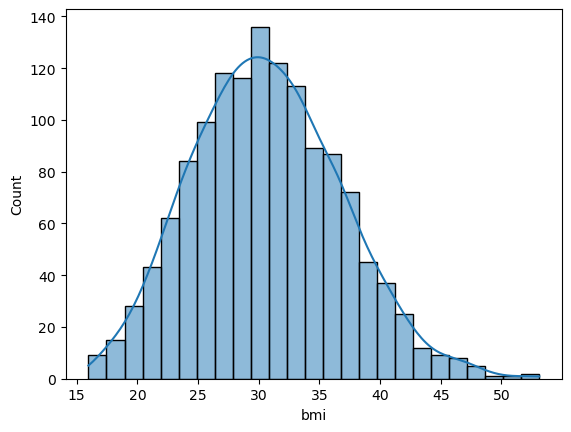

In [52]:
sns.histplot(df['bmi'], kde=True)

In [53]:
df_cleand['bmiCat'] = pd.cut(
    df_cleand['bmi'],
    bins=[0, 18.5, 24.9, 29.9, np.inf],
    labels=['Underweight', 'Normal weight', 'Overweight', 'Obesity']
)

In [54]:
df_cleand

,age,isFemale,bmi,children,isSmoker,charges,region_northwest,region_southeast,region_southwest,bmiCat
0,19,1,27,0,1,16884,0,0,1,Overweight
1,18,0,33,1,0,1725,0,1,0,Obesity
2,28,0,33,3,0,4449,0,1,0,Obesity
3,33,0,22,0,0,21984,1,0,0,Normal weight
4,32,0,28,0,0,3866,1,0,0,Overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,Obesity
1334,18,1,31,0,0,2205,0,0,0,Obesity
1335,18,1,36,0,0,1629,0,1,0,Obesity
1336,21,1,25,0,0,2007,0,0,1,Overweight


In [55]:
df_cleand = pd.get_dummies(df_cleand, columns=['bmiCat'], drop_first=True)

In [56]:
df_cleand = df_cleand.astype(int)

In [57]:
df_cleand

,age,isFemale,bmi,children,isSmoker,charges,region_northwest,region_southeast,region_southwest,bmiCat_Normal weight,bmiCat_Overweight,bmiCat_Obesity
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,0,0,1
1334,18,1,31,0,0,2205,0,0,0,0,0,1
1335,18,1,36,0,0,1629,0,1,0,0,0,1
1336,21,1,25,0,0,2007,0,0,1,0,1,0


In [58]:
df_cleand.columns

Index(['age', 'isFemale', 'bmi', 'children', 'isSmoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmiCat_Normal weight', 'bmiCat_Overweight', 'bmiCat_Obesity'],
      dtype='object')

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [60]:
cols = ['age', 'bmi', 'children']

In [61]:
df_cleand[cols] = scaler.fit_transform(df_cleand[cols])

In [62]:
df_cleand

,age,isFemale,bmi,children,isSmoker,charges,region_northwest,region_southeast,region_southwest,bmiCat_Normal weight,bmiCat_Overweight,bmiCat_Obesity
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,1,0,0,0,0,1
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,0,0,0,0,1
1335,-1.511647,1,0.952670,-0.909234,0,1629,0,1,0,0,0,1
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0,1,0,1,0


In [63]:
from scipy.stats import pearsonr

# ----------------------------------
# Pearson Correlation Calculation
# ----------------------------------

# List of features to check against target
selected_features = [
    'age', 'bmi', 'children', 'isFemale', 'isSmoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmiCat_Normal weight', 'bmiCat_Overweight', 'bmiCat_Obesity'
]

correlations = {
    feature: pearsonr(df_cleand[feature], df_cleand['charges'])[0]
    for feature in selected_features
}
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])
correlation_df.sort_values(by='Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
4,isSmoker,0.787234
0,age,0.298309
10,bmiCat_Obesity,0.200348
1,bmi,0.196236
6,region_southeast,0.073577
2,children,0.067390
5,region_northwest,-0.038695
7,region_southwest,-0.043637
3,isFemale,-0.058046
8,bmiCat_Normal weight,-0.104042


In [64]:
df_cleand.columns

Index(['age', 'isFemale', 'bmi', 'children', 'isSmoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmiCat_Normal weight', 'bmiCat_Overweight', 'bmiCat_Obesity'],
      dtype='object')

In [65]:
cat_features = ['isFemale', 'isSmoker', 
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmiCat_Normal weight', 'bmiCat_Overweight', 'bmiCat_Obesity']

In [66]:
from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05

df_cleand['charges_bin'] = pd.qcut(df_cleand['charges'], q=4, labels=False)
chi2_results = {}
# Convert continuous charges into categorical bins (quartiles) 
# This enables chi-square tests between categorical features and charges
# 4 quartile groups are created (0,1,2,3) representing low to high charges
for col in cat_features:
    contingency = pd.crosstab(df_cleand[col], df_cleand['charges_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df

,chi2_statistic,p_value,Decision
isSmoker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
isFemale,10.258784,0.01649,Reject Null (Keep Feature)
bmiCat_Obesity,8.515711,0.036473,Reject Null (Keep Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
bmiCat_Overweight,4.25149,0.235557,Accept Null (Drop Feature)
bmiCat_Normal weight,3.708088,0.29476,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


In [67]:
final_df = df_cleand[['age', 'isFemale', 'bmi', 'children', 'isSmoker', 'charges','region_southeast','bmiCat_Obesity']]

In [68]:
final_df

,age,isFemale,bmi,children,isSmoker,charges,region_southeast,bmiCat_Obesity
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0
1,-1.511647,0,0.462463,-0.079442,0,1725,1,1
2,-0.799350,0,0.462463,1.580143,0,4449,1,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,0
...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,0,1
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,1
1335,-1.511647,1,0.952670,-0.909234,0,1629,1,1
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0


In [69]:
X = final_df.drop(columns=['charges'])
y = final_df['charges']

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [71]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [73]:
y_pred = model.predict(x_test)

In [74]:
r2 = r2_score(y_test, y_pred)


In [75]:
n = x_train.shape[0]  # number of samples
p = x_train.shape[1]  # number of predictors    
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [77]:
print(r2)
print(adj_r2)

0.8040712413347119
0.802778591654545
